# Pregunta 1 tarea 3: Tomás Couso Coddou

In [609]:
import pandas as pd
import numpy as np

In [610]:
n_alumno = 18211933

In [611]:
np.random.seed(n_alumno)

In [612]:
# Import dataset
df = pd.read_csv("data/bd_titanic.csv", index_col=0)

In [613]:
df.head()

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,S,3,male,22.0,1.0,0.0,7.2500,0.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,1,female,38.0,1.0,0.0,71.2833,1.0
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,3,female,26.0,0.0,0.0,7.9250,1.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,1,female,35.0,1.0,0.0,53.1000,1.0
5,"Allen, Mr. William Henry",373450,S,3,male,35.0,0.0,0.0,8.0500,0.0


In [614]:
df.dtypes

Name         object
Ticket       object
Embarked     object
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Survived    float64
dtype: object

# Actividad 1: Limpieza del set de datos

In [615]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,712.000000,888.000000,887.000000,889.000000,888.000000
mean,2.308642,29.675801,0.523649,0.382187,32.257845,0.382883
std,0.836071,14.523875,1.104211,0.807302,49.736433,0.486364
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Tratamiento de datos nulos

In [616]:
# Instanciamos generador de datos aleatorios

missing_data_gen = np.random.default_rng()

In [8]:
# Verificamos datos nulos
df.isnull().any()

Name         True
Ticket       True
Embarked     True
Pclass      False
Sex          True
Age          True
SibSp        True
Parch        True
Fare         True
Survived     True
dtype: bool

In [9]:
df[df["Embarked"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
62,"Icard, Miss. Amelie",113572,NaN,1,female,38.0,0.0,0.0,80.0000,1.0
276,"Andrews, Miss. Kornelia Theodosia",13502,NaN,1,female,63.0,1.0,0.0,77.9583,1.0
830,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,NaN,1,female,62.0,0.0,0.0,80.0000,1.0


Para el caso del puerto de embarque (y otras variables categóricas ausentes), se podría calcular la probabilidad de embarcarse en cada uno de los puertos existentes e introducir datos para los valores faltantes en base a dichas probabilidades. Sin embargo, por tratarse de una cantidad menor de casos, se optará por eliminar dichas instancias para evitar introducir ruido a los datos.

In [12]:
null_embarked_indexes = df[df["Embarked"].isnull()].index
df.drop(index=null_embarked_indexes, inplace=True)

In [13]:
df[df["Sex"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
776,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",347078,S,3,NaN,18.0,0.0,0.0,7.75,0.0


Dado que el nombre de la instancia con sexo nulo tiene el prefijo 'Mr.', se asumirá que dicha persona es de sexo masculino

In [14]:
missing_sex_index = df[df["Sex"].isnull()].index
df.loc[missing_sex_index, "Sex"] = "male"

In [15]:
df[df["Age"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
6,"Moran, Mr. James",330877,Q,3,male,NaN,0.0,0.0,8.4583,0.0
18,"Williams, Mr. Charles Eugene",244373,S,2,male,NaN,0.0,0.0,13.0000,1.0
20,"Masselmani, Mrs. Fatima",2649,C,3,female,NaN,0.0,0.0,7.2250,1.0
27,"Emir, Mr. Farred Chehab",2631,C,3,male,NaN,0.0,0.0,7.2250,0.0
29,"O'Dwyer, Miss. Ellen ""Nellie""",330959,Q,3,female,NaN,0.0,0.0,7.8792,1.0
...,...,...,...,...,...,...,...,...,...,...
860,"Razi, Mr. Raihed",2629,C,3,male,NaN,0.0,0.0,7.2292,0.0
864,"Sage, Miss. Dorothy Edith ""Dolly""",CA. 2343,S,3,female,NaN,8.0,2.0,69.5500,0.0
869,"van Melkebeke, Mr. Philemon",345777,S,3,male,NaN,0.0,0.0,9.5000,0.0


A diferencia de lo observado para el atributo de puerto de embarque, el atributo de edad tiene una cantidad considerable de datos nulos, de modo que se introducirán datos para evitar perder información. Para efectos de introducir datos sintéticos a la edad de los pasajeros, se obtendrá las distribuciones de la edad para variables categóricas fijas. Por mantener la simplicidad del análisis, y debido a la ausencia de datos nulos para dicha variable, se obtendrán las distribuciones de la edad para valores fijos del atributo "Sexo". De tal modo, se calcularán dos distribuciones de edad, una para el valor "male", otra para el valor "female".

Como primer paso para determinar la distribución adecuada para la edad de pasajeros hombres y mujeres, primero se inspeccionará visualmente la distribución de dichas variables

In [16]:
df[(df["Age"].isnull()) & (df["Sex"] == "female")].shape

(54, 10)

<AxesSubplot:title={'center':'Edad de pasajeras de sexo femenino'}, ylabel='Density'>

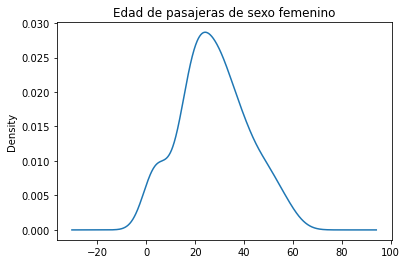

In [17]:
# Edad en mujeres

df[df["Sex"] == "female"]["Age"].plot.density(
    title="Edad de pasajeras de sexo femenino"
)

In [18]:
df[(df["Age"].isnull()) & (df["Sex"] == "male")].shape

(125, 10)

<AxesSubplot:title={'center':'Edad de pasajeros de sexo masculino'}, ylabel='Density'>

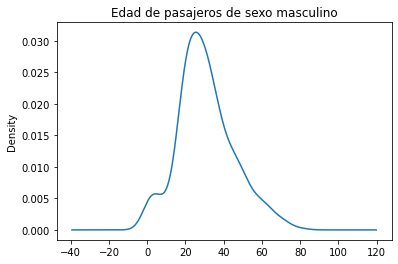

In [19]:
# Edad en hombre

df[df["Sex"] == "male"]["Age"].plot.density(
    title="Edad de pasajeros de sexo masculino"
)

En base a la forma acampanada y simétrica de ambas distribuciones, se asumirá como supuesto que la edad distribuye normal para ambos sexos. Por lo tanto, los datos sintéticos seran generados mediante distribuciones normales.

In [20]:
# Parametros edad

mu_male = df[df["Sex"] == "male"]["Age"].mean()
sigma_male = df[df["Sex"] == "male"]["Age"].std()

mu_female = df[df["Sex"] == "female"]["Age"].mean()
sigma_female = df[df["Sex"] == "female"]["Age"].std()

In [21]:
# Generamos el conjunto de datos


# Hombres

null_age_male_indexes = df[(df["Age"].isnull()) & (df["Sex"] == "male")].index
n_missing_age_male = len(df[(df["Age"].isnull()) & (df["Sex"] == "male")])

missing_male_age = missing_data_gen.normal(
    loc=mu_male, 
    scale=sigma_male, 
    size=n_missing_age_male)

missing_male_age_series = pd.Series(
    data=missing_male_age, 
    index=null_age_male_indexes, 
    dtype=np.float64)

In [22]:
# Generamos el conjunto de datos


# Mujeres

null_age_female_indexes = df[(df["Age"].isnull()) & (df["Sex"] == "female")].index
n_missing_age_female = len(df[(df["Age"].isnull()) & (df["Sex"] == "female")])

missing_female_age = missing_data_gen.normal(
    loc=mu_female, 
    scale=sigma_female, 
    size=n_missing_age_female)

missing_female_age_series = pd.Series(
    data=missing_female_age, 
    index=null_age_female_indexes, 
    dtype=np.float64)

In [23]:
# Asignamos los datos generados a las intancias correspondientes
# Como los datos generados por una normal pueden (con baja probabilidad)
# ser negativos, se tomará el valor absoluto de dichos valores

df["Age"].fillna(missing_female_age_series.apply(abs), inplace=True)
df["Age"].fillna(missing_male_age_series.apply(abs), inplace=True)

In [24]:
df[df["SibSp"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
379,"Betros, Mr. Tannous",2648,C,3,male,20.0,NaN,0.0,4.0125,0.0
451,"West, Mr. Edwy Arthur",C.A. 34651,S,2,male,36.0,NaN,2.0,27.7500,0.0
700,"Humblen, Mr. Adolf Mathias Nicolai Olsen",348121,S,3,male,42.0,NaN,0.0,7.6500,0.0


In [25]:
null_sibsp_indexes =df[df["SibSp"].isnull()].index
df.drop(index=null_sibsp_indexes, inplace=True)

Como se trata de pocos casos donde falta información sobre heramos y cóyuges, se descartarán dichas instancias.

In [26]:
df[df["Parch"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
172,"Rice, Master. Arthur",382652,Q,3,male,4.000000,4.0,NaN,29.1250,0.0
190,"Turcin, Mr. Stjepan",349247,S,3,male,36.000000,0.0,NaN,7.8958,0.0
440,"Kvillner, Mr. Johan Henrik Johannesson",C.A. 18723,S,2,male,31.000000,0.0,NaN,10.5000,0.0
602,"Slabenoff, Mr. Petco",349214,S,3,male,50.214237,0.0,NaN,7.8958,0.0


In [27]:
null_parch_indexes = df[df["Parch"].isnull()].index
df.drop(index=null_parch_indexes, inplace=True)

Se descartan las instancias donde falta inforación sobre padre e hijos.

In [28]:
df[df["Fare"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
41,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",7546,S,3,female,40.0,1.0,0.0,NaN,0.0
593,"Elsbury, Mr. William James",A/5 3902,S,3,male,47.0,0.0,0.0,NaN,0.0


In [29]:
null_fare_indexes = df[df["Fare"].isnull()].index
df.drop(index=null_fare_indexes, inplace=True)

Se descartan las instancias donde falta información sobre el precio pagado por los pasajes.

In [30]:
df[df["Survived"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
73,"Hood, Mr. Ambrose Jr",S.O.C. 14879,S,2,male,21.0,0.0,0.0,73.500,NaN
717,"Endres, Miss. Caroline Louise",PC 17757,C,1,female,38.0,0.0,0.0,227.525,NaN
748,"Sinkkonen, Miss. Anna",250648,S,2,female,30.0,0.0,0.0,13.000,NaN


Con el propósito de no introducir ruido a las etiquetas de nuestros datos, se descartarán las instancias donde el atributo de supervivencia sea nulo.

In [31]:
null_survived_indexes = df[df["Survived"].isnull()].index
df.drop(index=null_survived_indexes, inplace=True)

## Eliminación de columnas prescindibles

In [32]:
# Pasajeros con el nombre nulo
df[df["Name"].isnull()]

,Name,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,,
53,NaN,PC 17572,C,1,female,49.000000,1.0,0.0,76.7292,1.0
160,NaN,CA. 2343,S,3,male,27.288533,8.0,2.0,69.5500,0.0
192,NaN,28424,S,2,male,19.000000,0.0,0.0,13.0000,0.0
228,NaN,A/5 21173,S,3,male,20.500000,0.0,0.0,7.2500,0.0
255,NaN,370129,S,3,female,41.000000,0.0,2.0,20.2125,0.0
655,NaN,365226,Q,3,female,18.000000,0.0,0.0,6.7500,0.0
709,NaN,113781,S,1,female,22.000000,0.0,0.0,151.5500,1.0


Como supuesto, se asume que un nombre en particular no debería ser predictor de la supervivencia de un pasajero, de modo que se decartará dicho atributo.

In [33]:
df.drop("Name", axis=1, inplace=True)

In [34]:
# Pasajeros con ticket nulo
df[df["Ticket"].isnull()]

,Ticket,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,,
83,NaN,Q,3,female,17.530651,0.0,0.0,7.7875,1.0
418,NaN,S,2,female,18.000000,0.0,2.0,13.0000,1.0
586,NaN,S,1,female,18.000000,0.0,2.0,79.6500,1.0
605,NaN,C,1,male,35.000000,0.0,0.0,26.5500,1.0
758,NaN,S,2,male,18.000000,0.0,0.0,11.5000,0.0
865,NaN,S,2,male,24.000000,0.0,0.0,13.0000,0.0


Como supuesto, se asume que el número de ticket no debería ser predictor de la supervivencia de un pasajero, de modo que se decartará dicho atributo.

In [35]:
df.drop("Ticket", axis=1, inplace=True)

In [36]:
# Verificamos la ausencia de instancias nulas en la base de datos

df.isnull().any()

Embarked    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Survived    False
dtype: bool

## Verificación de tipo de datos de cada columna

In [37]:
df.dtypes

Embarked     object
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Survived    float64
dtype: object

Queremos que las variables categóricas sean object, que las variables discretas sean int, y que las variables continuas sean float64.

In [38]:
# Cambiamos la clase del pasaje a object

df["Pclass"] = df["Pclass"].astype("object")

In [39]:
# Cambiamos hermanos y cónyuges a int

df["SibSp"] = df["SibSp"].astype(int)

In [40]:
# Cambiamos padres e hijos a int

df["Parch"] = df["Parch"].astype(int)

In [41]:
# Cambiamos supervivencia a object

df["Survived"] = df["Survived"].astype("object")

In [42]:
df.dtypes

Embarked     object
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived     object
dtype: object

# Actividad 2: Comprensión de los datos

In [43]:
df.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,
1,S,3,male,22.0,1,0,7.2500,0.0
2,C,1,female,38.0,1,0,71.2833,1.0
3,S,3,female,26.0,0,0,7.9250,1.0
4,S,1,female,35.0,1,0,53.1000,1.0
5,S,3,male,35.0,0,0,8.0500,0.0


## Descripción de variables independientes

Se observa que la mayoría de los pasajeros abordaron el el puerto de Southhampton. Al mismo tiempo aproximadamente un 55% de los pasajeros son de tercera clase, seguido por un 25% de tercera clase y un 20% de segunda clase.

La proporción entre hombres y mujeres es de 65% y 35% respectivamente. Las edades promedio de los pasajeros son 29 años con una desviación estandar de 14 años. El promedio de padres/hijos y hermanos/cónyuges es de 0.38 y 0.52 respectivamente. Por último, el monto promedio de tarifa es de 31.998187, y presenta alta dispersión, con una desviaión estándar de 49.531009.

Por último, un 38% de los pasajeros sobrevivieron.

## Supervivencia de pasajeros

A continuación, se estudiarán las proporciones de supervivientes bajo diferentes filtros del conjunto de datos. Se espera estudiar las probabilidades condicionales de supervivencia bajo diferentes escenarios, con el fin de obtener intuiciones sobre qué atributos podrían ser de relevancia a la hora de implementar las predicciones con árboles de decisión.

### Visualización 1: Supervivencia no condicionada

El siguiente gráfico muestra la distribución de pasajeros que sobrevivieron o no sobrevivieron. Dicha información es relevante en tanto se pretende predecir el valor de tal atributo, de modo que es necesario saber qué proporciones de supervivencia/no supervivencia existen en el dataset completo para verificar si se preservan o no en las predicciones.


<AxesSubplot:title={'center':'Supervivencia de pasajeros\n1: Sobrevive\n0: No sobrevive'}, ylabel='Survived'>

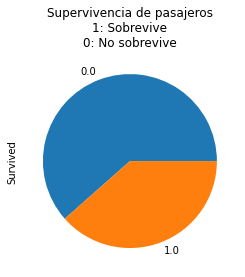

In [599]:
# Visualización: Distribución de supervivencia de pasajeros

df["Survived"].value_counts(normalize=True).plot(kind="pie", title="Supervivencia de pasajeros\n1: Sobrevive\n0: No sobrevive")


In [600]:
# Probabilidades de supervivencia no condicionadas

df["Survived"].value_counts(normalize=True)

0.0    0.615297
1.0    0.384703
Name: Survived, dtype: float64

### Condición de sexo

In [45]:
df["Sex"].value_counts(normalize=True)

male      0.648402
female    0.351598
Name: Sex, dtype: float64

### Visualización 2: Supervivencia condicionada a sexo

Las siguientes dos visualizaciones muestran la supervivencia de pasajeros de sexo masculino y de sexo femenino, respectivamente. La relevancia de dichas visualizaciones radica en que ilustran de manera clara como el sexo de un pasajero es un atributo predictor de su supervivencia, donde se observó una marcada diferencia a favor de los pasajeros de sexo femenino.

<AxesSubplot:title={'center':'Supervivencia de pasajeros de sexo masculino'}, ylabel='Survived'>

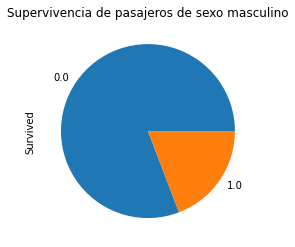

In [603]:
# Supervivencia de hombres
male_mask = df["Sex"] == "male"
df.loc[male_mask]["Survived"].value_counts(normalize=True).plot(
    kind="pie",
    title="Supervivencia de pasajeros de sexo masculino"
)


In [605]:
# Supervivencia hombres
df.loc[male_mask]["Survived"].value_counts(normalize=True)

0.0    0.808099
1.0    0.191901
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'Supervivencia de pasajeros de sexo femenino'}, ylabel='Survived'>

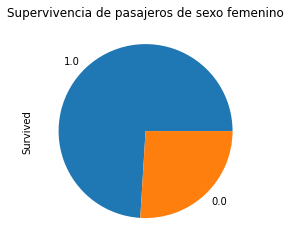

In [604]:
female_mask = df["Sex"] == "female"
df.loc[female_mask]["Survived"].value_counts(normalize=True).plot(
    kind="pie",
    title="Supervivencia de pasajeros de sexo femenino"
)

In [606]:
# Supervivencia mujeres
df.loc[female_mask]["Survived"].value_counts(normalize=True)

1.0    0.74026
0.0    0.25974
Name: Survived, dtype: float64

### Condición de clase de pasaje

In [50]:
df["Pclass"].value_counts(normalize=True)

3    0.552511
1    0.242009
2    0.205479
Name: Pclass, dtype: float64

In [51]:
first_class_mask = df["Pclass"] == 1
df.loc[first_class_mask]["Survived"].value_counts(normalize=True)

1.0    0.622642
0.0    0.377358
Name: Survived, dtype: float64

In [52]:
second_class_mask = df["Pclass"] == 2
df.loc[second_class_mask]["Survived"].value_counts(normalize=True)

0.0    0.522222
1.0    0.477778
Name: Survived, dtype: float64

In [53]:
third_class_mask = df["Pclass"] == 3
df.loc[third_class_mask]["Survived"].value_counts(normalize=True)

0.0    0.754132
1.0    0.245868
Name: Survived, dtype: float64

Se observa que la probabilidad de supervivencia está condicionada al tipo de pasaje que dispone un pasajero, donde la tasa de supervivencia es mayor según más exclusiva sea la clase del pasaje.

### Condición de monto cancelado por los pasajes

In [54]:
df["Fare"].describe()

count    876.000000
mean      31.998187
std       49.531009
min        0.000000
25%        7.925000
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Visualización 3: Distribución de montos cancelados por pasajeros

El siguiente gráfico muestra la distribución de montos cancelados por los pasajeros a bordo. Dicha visualización es relevante en tanto se pudo observar que el monto cancelado era un buen predictor de la supervivencia de un pasajero. Como se observa en la gráfica, el monto cancelado es bastante elongado hacia la derecha, lo que permite especular que hacer particiones a partir de este atributo puede separar en buena medida los supervivientes de los no supervivientes.

<AxesSubplot:title={'center':'Monto cancelado por pasajeros a bordo'}, ylabel='Density'>

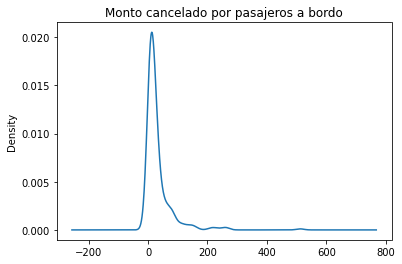

In [607]:
# Visualización 3: Distribución de montos pagados por pasajeros a bordo

df["Fare"].plot.density(title="Monto cancelado por pasajeros a bordo")

Se observa una alta dispersión en torno al monto pagado por los pasajes. Para observar la supervivencia condicionada al monto, se establecerá una frontera entre montos outliers y montos regulares en 80.0.

In [56]:
df.loc[df["Fare"] < 80]["Survived"].value_counts(normalize=True)

0.0    0.650062
1.0    0.349938
Name: Survived, dtype: float64

In [57]:
df.loc[df["Fare"] >= 80]["Survived"].value_counts(normalize=True)

1.0    0.767123
0.0    0.232877
Name: Survived, dtype: float64

Se observa que la proporcioń de supervivientes en el monto outlier es de un 77%, mientras que en el monto no outlier es de un 35%. Cómo se observa a continuación, todos los pasajes en ese monto corresponden a tickets de primera clase. 

In [58]:
df.loc[df["Fare"] >= 80]["Pclass"].value_counts()

1    73
Name: Pclass, dtype: int64

A continuación, se observará la supervivencia codicionada al monto pagado para los tickets de cada clase. Para aquello, se dividen los pasajeros de cada clase en dos intervalos de valores, que definen los pasajeros que pagaron baja tarifa (1) y los que pagaron alta tarifa (2).

In [144]:
# Pasajeros de primera clase
first_class = df.loc[df["Pclass"] == 1].copy()
first_class["FareRange"] = pd.cut(first_class["Fare"], 
                                  bins=2, 
                                  labels=["1_low", "1_high"])

In [145]:
first_class.loc[first_class["FareRange"] == "1_low"]["Survived"].value_counts(normalize=True)

1.0    0.615764
0.0    0.384236
Name: Survived, dtype: float64

In [146]:
first_class.loc[first_class["FareRange"] == "1_high"]["Survived"].value_counts(normalize=True)

1.0    0.777778
0.0    0.222222
Name: Survived, dtype: float64

Para los pasajeros de primera clase, se observa que la supervivencia para los pasajeros de baja tarifa fue de un 62%, mientras que la de los de alta tarifa fue de un 78%, lo que indica que dentro del grupo de pasajeros de primera clase, el monto cancelado puede ser predictor de la supervivencia de un pasajero.

In [147]:
# Pasajeros de segunda clase
second_class = df.loc[df["Pclass"] == 2].copy()
second_class["FareRange"] = pd.cut(second_class["Fare"], 
                                   bins=2, 
                                   labels=["2_low", "2_high"])

In [148]:
second_class.loc[second_class["FareRange"] == "2_low"]["Survived"].value_counts(normalize=True)

0.0    0.527273
1.0    0.472727
Name: Survived, dtype: float64

In [149]:
second_class.loc[second_class["FareRange"] == "2_high"]["Survived"].value_counts(normalize=True)

1.0    0.533333
0.0    0.466667
Name: Survived, dtype: float64

Para los pasajeros de segunda clase, se observa que la supervivencia para los pasajeros de baja tarifa fue de un 47%, mientras que la de los de alta tarifa fue de un 53%, lo que indica que dentro del grupo de pasajeros de segunda clase, el monto cancelado puede ser predictor de la supervivencia de un pasajero.

In [151]:
# Pasajeros de tercera clase
third_class = df.loc[df["Pclass"] == 3].copy()
third_class["FareRange"] = pd.cut(third_class["Fare"],
                                  bins=2, 
                                  labels=["3_low", "3_high"])

In [152]:
third_class.loc[third_class["FareRange"] == "3_low"]["Survived"].value_counts(normalize=True)

0.0    0.751092
1.0    0.248908
Name: Survived, dtype: float64

In [153]:
third_class.loc[third_class["FareRange"] == "3_high"]["Survived"].value_counts(normalize=True)

0.0    0.807692
1.0    0.192308
Name: Survived, dtype: float64

Para los pasajeros de tercera clase, se observa que la supervivencia para los pasajeros de baja tarifa fue de un 24%, mientras que la de los de alta tarifa fue de un 19%, lo que indica que dentro del grupo de pasajeros de tercera clase, el monto cancelado puede ser predictor de la supervivencia de un pasajero, pero de la manera inversa a como ocurre con los pasajeros de primera y segunda clase.

In [156]:
# Asignamos las categorías discretas al set de datos principal

cat_fares = pd.concat([
    first_class["FareRange"],
    second_class["FareRange"],
    third_class["FareRange"]
]).sort_index()

df["CatFares"] = cat_fares

### Puerto de embarque de los pasajeros

In [62]:
df["Embarked"].value_counts(normalize=True)

S    0.723744
C    0.189498
Q    0.086758
Name: Embarked, dtype: float64

In [63]:
cherbourgh_mask = df["Embarked"] == "C"
df.loc[cherbourgh_mask]["Survived"].value_counts(normalize=True)

1.0    0.554217
0.0    0.445783
Name: Survived, dtype: float64

In [64]:
queenstown_mask = df["Embarked"] == "Q"
df.loc[queenstown_mask]["Survived"].value_counts(normalize=True)

0.0    0.605263
1.0    0.394737
Name: Survived, dtype: float64

In [65]:
southhampton_mask = df["Embarked"] == "S"
df.loc[southhampton_mask]["Survived"].value_counts(normalize=True)

0.0    0.660883
1.0    0.339117
Name: Survived, dtype: float64

Para los pasajeros embarcados en Cherbourgh, se observa una leve tendencia hacia la supervivencia de los pasajeros ahí embarcados. Sin embargo, para los pasajeros embarcados en Southhampton y Queenstown, se observa una tendencia hacia la no supervivencia de los pasajeros.
Para comprender por qué podría darse tal tendencia, se evaluan a continuación posibles variables mediadoras de este fenómeno.

In [66]:
# Tipo de pasajes de pasajeros embarcados en Queenstown
df.loc[queenstown_mask]["Pclass"].value_counts(normalize=True)

3    0.934211
2    0.039474
1    0.026316
Name: Pclass, dtype: float64

In [67]:
# Tipo de pasajes de pasajeros embarcados en Southhampton
df.loc[southhampton_mask]["Pclass"].value_counts(normalize=True)

3    0.548896
2    0.252366
1    0.198738
Name: Pclass, dtype: float64

In [68]:
# Tipo de pasajes de pasajeros embarcados en Cherbourgh
df.loc[cherbourgh_mask]["Pclass"].value_counts(normalize=True)

1    0.506024
3    0.391566
2    0.102410
Name: Pclass, dtype: float64


Puede observarse en las anteriores probabilidades que la mayoria de los pasajeros de Southhampton y Queenstown (los puertos con mayor probabilidad de no supervivencia) tienen pasajes de tercera clase, mientras que para para Cherbourgh (el puerto donde se observó una leve tendencia hacia la supervivencia) la mayoría de las personas tiene pasajes de primera o segunda clase. Aquello permite especular que las tendencias observadas en el puerto de embarque son en realidad explicadas por la clase del pasaje.

### Condición de rangos etarios

In [69]:
df["Age"].describe()

count    876.000000
mean      29.903498
std       14.319640
min        0.420000
25%       20.449468
50%       28.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

### Visualización 4: Distribución etaria de pasajeros 

Se obserba a continuación la distribución etaria de los pasajeros. Dicha gráfica es relevante en tanto, como se observará a continuación, la edad de los pasajeros es predictor de la supervivencia de estos, donde destaca la tendencia a una mayor supervivencia por parte de los pasajeros jóvenes. 

<AxesSubplot:title={'center':'Edad de los pasajeros'}, ylabel='Density'>

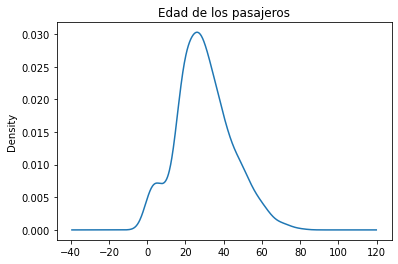

In [608]:
# Visualización 4: Distribución etaria de los pasajeros

df["Age"].plot.density(title="Edad de los pasajeros")

In [70]:
df.loc[df["Age"] > 70]

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,,
97,C,1,male,71.000000,0,0,34.6542,0.0
117,Q,3,male,70.500000,0,0,7.7500,0.0
325,S,3,male,74.930553,8,2,69.5500,0.0
494,C,1,male,71.000000,0,0,49.5042,0.0
631,S,1,male,80.000000,0,0,30.0000,1.0
852,S,3,male,74.000000,0,0,7.7750,0.0


In [97]:
age_ranges = pd.cut(df["Age"], 
                    bins=5, 
                    labels=["0-16", "17-32","33-48", "49-64", "65-80"])
df["AgeRange"] = age_ranges

In [92]:
df[df["AgeRange"] == "0-16"]["Survived"].value_counts(normalize=True)

1.0    0.508197
0.0    0.491803
Name: Survived, dtype: float64

In [93]:
df[df["AgeRange"] == "17-32"]["Survived"].value_counts(normalize=True)

0.0    0.63285
1.0    0.36715
Name: Survived, dtype: float64

In [94]:
df[df["AgeRange"] == "33-48"]["Survived"].value_counts(normalize=True)

0.0    0.62963
1.0    0.37037
Name: Survived, dtype: float64

In [95]:
df[df["AgeRange"] == "49-64"]["Survived"].value_counts(normalize=True)

0.0    0.619048
1.0    0.380952
Name: Survived, dtype: float64

In [96]:
df[df["AgeRange"] == "65-80"]["Survived"].value_counts(normalize=True)

0.0    0.923077
1.0    0.076923
Name: Survived, dtype: float64

Se observa la mayor probabilidad de supervivencia para el rango etario de 0-16 años, seguido de 49-64 años, 33-48 años, 17-32 años, y por último 65-80 años. El único caso donde se observó una probabilidad de supervivencia favorable fue para el rango etario más joven.

### Condición de familiares a bordo

In [77]:
df["SibSp"].value_counts()

0    597
1    206
2     28
4     17
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [78]:
df["Parch"].value_counts()

0    665
1    117
2     79
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Para estudiar el efecto de los familiares a bordo, se establecerán dos categorías, referentes a la presencia o no de familiares a bordo (para el caso de hermanos/cónyuges y padres/hijos por separado).

In [79]:
# Columna categórica de presencia o ausencia de familiares

cat_sibsp = df["SibSp"].apply(lambda n: "yes" if n > 0 else "no")
cat_parch = df["Parch"].apply(lambda n: "yes" if n > 0 else "no")

df["CatParch"] = cat_parch
df["CatSibSp"] = cat_sibsp

In [80]:
df[df["CatSibSp"] == "yes"]["Survived"].value_counts(normalize=True)

0.0    0.530466
1.0    0.469534
Name: Survived, dtype: float64

In [81]:
df[df["CatSibSp"] == "no"]["Survived"].value_counts(normalize=True)

0.0    0.654941
1.0    0.345059
Name: Survived, dtype: float64

In [82]:
df[df["CatParch"] == "yes"]["Survived"].value_counts(normalize=True)

1.0    0.516588
0.0    0.483412
Name: Survived, dtype: float64

In [83]:
df[df["CatParch"] == "no"]["Survived"].value_counts(normalize=True)

0.0    0.657143
1.0    0.342857
Name: Survived, dtype: float64

Para el caso de hermanos/cónyuges, se observa una mayor probabilidad de supervivencia para quienes tienen hermanos/cónyuges a bordo en comparación a quienes no tienen, con porcentajes de supervivencia de 47% y 35% respectivamente.

Para el caso de padres/hijos, la probabilidad de supervivencia en dicho caso fue de 52% para quienes tenían padres/hijos a bordo, versus 34% para quienes no tenían. Dichos valores podrían explicarse en base a la edad, en tanto se puede observar que quienes tienen padres/hijos a bordo tienden a ser más jóvenes.

In [84]:
df[df["CatParch"] == "yes"]["Age"].describe()

count    211.000000
mean      23.986767
std       17.154483
min        0.420000
25%        9.000000
50%       23.000000
75%       36.750000
max       74.930553
Name: Age, dtype: float64

# Actividad 3: Visualización de los datos

Las cuatro gráficas solicitadas fueron renderizadas y descritas en la sección anterior para efectos de la comprensión de los datos.

# Actvidad 4: Pre-procesamiento de los datos

In [157]:
df.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,CatParch,CatSibSp,AgeRange,CatFares
PassengerId,,,,,,,,,,,,
1,S,3,male,22.0,1,0,7.2500,0.0,no,yes,17-32,3_low
2,C,1,female,38.0,1,0,71.2833,1.0,no,yes,33-48,1_low
3,S,3,female,26.0,0,0,7.9250,1.0,no,no,17-32,3_low
4,S,1,female,35.0,1,0,53.1000,1.0,no,yes,33-48,1_low
5,S,3,male,35.0,0,0,8.0500,0.0,no,no,33-48,3_low


Para efectos de la comprensión de los datos (Actividad 2), se armaron variables categóricas basadas en rangos de valores de las variables continuas. A continuación, se procederá a instanciar una matriz de valores exclusivamente categóricos, y a codificar dichos valores para que todos queden en formato numérico.

In [183]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [162]:
cat_df = df[["Embarked", "Pclass", "Sex", "AgeRange", "CatSibSp", "CatParch", "CatFares", "Survived"]]

In [165]:
cat_df.head()

,Embarked,Pclass,Sex,AgeRange,CatSibSp,CatParch,CatFares,Survived
PassengerId,,,,,,,,
1,S,3,male,17-32,yes,no,3_low,0.0
2,C,1,female,33-48,yes,no,1_low,1.0
3,S,3,female,17-32,no,no,3_low,1.0
4,S,1,female,33-48,yes,no,1_low,1.0
5,S,3,male,33-48,no,no,3_low,0.0


In [167]:
# Instanciamos encoders

embarked_enc = preprocessing.LabelEncoder()
pclass_enc = preprocessing.LabelEncoder()
sex_enc = preprocessing.LabelEncoder()
agerange_enc = preprocessing.LabelEncoder()
sibsp_enc = preprocessing.LabelEncoder()
parch_enc = preprocessing.LabelEncoder()
fares_enc = preprocessing.LabelEncoder()

In [268]:
# Definimos set de datos codificados

enc_df = pd.DataFrame([
    embarked_enc.fit_transform(cat_df["Embarked"]).astype(int),
    pclass_enc.fit_transform(cat_df["Pclass"]).astype(int),
    sex_enc.fit_transform(cat_df["Sex"]).astype(int),
    agerange_enc.fit_transform(cat_df["AgeRange"]).astype(int),
    sibsp_enc.fit_transform(cat_df["CatSibSp"]).astype(int),
    parch_enc.fit_transform(cat_df["CatParch"]).astype(int),
    fares_enc.fit_transform(cat_df["CatFares"]).astype(int)
]).T

enc_df.columns =["Embarked", "Pclass", "Sex", "Age", "Sibsp", "Parch", "Fares"]


In [293]:
enc_df.head()

,Embarked,Pclass,Sex,Age,Sibsp,Parch,Fares
0,2,2,1,1,1,0,5
1,0,0,0,2,1,0,1
2,2,2,0,1,0,0,5
3,2,0,0,2,1,0,1
4,2,2,1,2,0,0,5


In [426]:
# Definimos variables independientes (X)

X = enc_df

# Definimos variable dependiente (y)

y = cat_df["Survived"].astype(int)

A continuación, se definen los conjuntos de entrenamiento, validación y testeo.

#### Proporciones usadas para cada set

Para la definición de proporciones, se reservaran (en base a la "Rule of Thumb" mencionada en la clase de introducción a Machine Learning) un 80% de los datos a entrenamiento, un 10% a validación y el 10% restante a testeo. 

La proporción de datos dedicados a entrenamiento se decidió de al manera en en tanto no se dispone de una cantidad tan vasta de datos, de modo que al asignar una mayor cantidad de instancias a entrenamiento, se reduce la posibilidad de sesgo en el entrenamiento del modelo. 

#### Definición de conjunto de validación

Se reserva una proporción de los datos en un conjunto de validación con el propósito de disponer de datos específicos para ajustar los hiperparámetros del arbol de decisión. Es importante que se usen instancias diferentes a las que posteriormente serán usadas para testear el rendimiento del árbol, dado que al ajustar hiperparámetros le damos  información al modelo sobre el conjunto de datos sobre el que probamos los hiperparámetros, de modo que si posteriormente ponemos a prueba el modelo en dichos datos, posiblemente el desempeño resultante sería una sobrestimación del rendimiento real.


In [281]:
# Definimos conjunto de entrenamiento

X_train, X_remaining, y_train, y_remaining = train_test_split(
    X,
    y, 
    test_size=0.2,
    shuffle=True,
    stratify=y
)

In [282]:
# Definimos conjuntos de validación y testeo en base a los datos restantes

X_validation, X_test, y_validation, y_test = train_test_split(
    X_remaining, 
    y_remaining, 
    test_size=0.5,
    shuffle=True,
    stratify=y_remaining
)

#### Instancias de variable "Survived" en cada set

La proporción de instancias de pasajeros sobrevivientes en cada uno de los conjuntos definidos está adecuadamente balanceadas, en tanto las proporciones observadas en el conjunto completo de datos se preservan en los demás conjuntos definidos. Esto es así dado a que al armar los conjuntos, se estratificó la muestra en base a las proporciones presentes en el conjunto completo de datos.

El tener conjuntos de entrenamiento, validación y testeo con las mismas proporciones de valores en la variable a predecir es importante debido a que, de no existir dicho balance, el entrenamiento del modelo se llevaría a cabo de manera sesgada, lo que llevaría al modelo a predecir de manera sesgada. Por ejemplo, si en el conjunto de entrenamiento tuviésemos una proporción 50-50 entre supuerviventes y no supervivientes, pero en el conjunto de testeo tuvieremos una proporción de 40-60, el modelo tendería a sobrestimar la cantidad de supervivientes al ser testeado, lo que implica que el rendimiento sería deficiente.

In [283]:
# Verificamos las proporciones de los conjuntos de datos recién armados

y.value_counts(normalize=True)

0    0.615297
1    0.384703
Name: Survived, dtype: float64

In [284]:

y_train.value_counts(normalize=True)

0    0.615714
1    0.384286
Name: Survived, dtype: float64

In [285]:
y_validation.value_counts(normalize=True)

0    0.613636
1    0.386364
Name: Survived, dtype: float64

In [286]:
y_test.value_counts(normalize=True)

0    0.613636
1    0.386364
Name: Survived, dtype: float64

# Actividad 5: Entrenamiento de arbol de decisión

In [380]:
from sklearn import tree
from sklearn import metrics

A continuación, se instancian 24 árboles de decisión en base a tres criterios de decisión (gini, entropía, log_loss), dos estrategias de particion de nodos (best, random) y 4 posibles niveles de profundidad (2, 3, 4, 5). Se midió el accuracy para dichos árboles en el set de validación, de manera tal que se tomará el árbol con mayor acuracy para ser evaluado en el set de test.

In [381]:
# Iteración de hiperparámetros de árbol de decisión

trees = []

criteria = ["gini", "entropy", "log_loss"]
splitters = ["best", "random"]
depths = [i for i in range(2, 6)]

for criterion in criteria:
    for splitter in splitters:
        for depth in depths:
            clf = tree.DecisionTreeClassifier(
                criterion=criterion,
                splitter=splitter,
                max_depth=depth
            )
            # Instanciamos árbol y predecimos
            clf = clf.fit(X_train.to_numpy(), y_train.to_numpy())
            y_validation_pred = clf.predict(X_validation.to_numpy())
            
            # Calculamos accuracy
            acc = metrics.accuracy_score(y_validation, y_validation_pred)
            
            trees.append(
                (acc, clf)
            )


In [382]:
trees.sort(key=lambda x: x[0])

In [383]:
# Tomamos el árbol con mayor accuracy

tree_clf = trees[-1][1]

In [384]:
# Ponemos a prueba el árbol seleccionado en el set de testeo

y_test_pred = tree_clf.predict(X_test.to_numpy())

In [385]:
# Métricas de desempeño de clasificación

tree_validation_metrics = metrics.classification_report(
    y_true=y_test,
    y_pred=y_test_pred
)

print(tree_validation_metrics)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.88      0.65      0.75        34

    accuracy                           0.83        88
   macro avg       0.84      0.80      0.81        88
weighted avg       0.84      0.83      0.82        88



#### Comentario sobre rendimiento del árbol de decisión

Se observa un rendimiento superior al 65% en el set de testeo.

# Actividad 6: Ensamblaje personalizado

In [576]:
class CustomRandomForest():
    
    def __init__(self, w1=0.5, w2=0.3, w3=0.2, **kwargs):
        
        # Clasificadores
        
        self.__clf1 = tree.DecisionTreeClassifier(**kwargs)
        self.__clf2 = tree.DecisionTreeClassifier(**kwargs)
        self.__clf3 = tree.DecisionTreeClassifier(**kwargs)
        
        # Pesos (deben sumar 1)
        
        assert w1 + w2 + w3 > 0.9999999
        
        self.__w1 = w1
        self.__w2 = w2
        self.__w3 = w3
        

    def fit(self, X, y, ):

        # Arbol 1

        clf1_X_train,clf1_X_test, clf1_y_train, clf1_y_test = train_test_split(
            X, 
            y, 
            test_size=0.4,
            stratify=y
        )

        self.__clf1 = self.__clf1.fit(clf1_X_train, clf1_y_train)
        clf1_pred = self.__clf1.predict(clf1_X_test)

        clf1_wrong_X = clf1_X_test[np.where(clf1_pred != clf1_y_test)]
        clf1_wrong_y = clf1_y_test[np.where(clf1_pred != clf1_y_test)]

        # Arbol 2

        clf2_X_train, clf2_X_test, clf2_y_train, clf2_y_test = train_test_split(
            clf1_wrong_X, 
            clf1_wrong_y, 
            test_size=0.4,
            stratify=clf1_wrong_y
        )

        self.__clf2 = self.__clf2.fit(clf2_X_train, clf2_y_train)
        clf2_pred = self.__clf2.predict(clf2_X_test)

        clf2_wrong_X = clf2_X_test[np.where(clf2_pred != clf2_y_test)]
        clf2_wrong_y = clf2_y_test[np.where(clf2_pred != clf2_y_test)]

        # Arbol 3

        clf12_wrong_X = np.concatenate([clf1_wrong_X, clf2_wrong_X])
        clf12_wrong_y = np.concatenate([clf1_wrong_y, clf2_wrong_y])

        self.__clf3 = self.__clf3.fit(clf12_wrong_X, clf12_wrong_y)

        return self

    def predict(self, X_test):
        
        predict_proba =  self.__w1 * self.__clf1.predict_proba(X_test)
        + self.__w1 * self.__clf1.predict_proba(X_test) 
        + self.__w1 * self.__clf1.predict_proba(X_test)
    
        return np.array(
            [n for n in map(lambda x: 0 if x[0] >= x[1] else 1, predict_proba)]
        )

Notar que el el método ```fit``` del ensamble personalizado, se usa una proporción alta (40%) del set de datos para testeo. Esto tiene el propósito de evitar que el conjunto de clasificaciones erroneas sea muy pequeño, dado que cuando pasa eso, no es posible usar dichos datos para entrenar al siguiente árbol.

In [577]:
# Testeo de módulo

inner_X = X.copy()
inner_y = y.copy()

inner_X_train,inner_X_test, inner_y_train, inner_y_test = train_test_split(
    inner_X.to_numpy(), 
    inner_y.to_numpy(), 
    test_size=0.2,
    stratify=inner_y
)

custom_clf = CustomRandomForest()
custom_clf = custom_clf.fit(inner_X_train, inner_y_train)
custom_clf.predict(inner_X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [578]:
# Iteración de hiperparámetros del ensamble personalizado

custom_forests = []

criteria = ["gini", "entropy", "log_loss"]
splitters = ["best", "random"]
depths = [i for i in range(2, 6)]

for criterion in criteria:
    for splitter in splitters:
        for depth in depths:
            clf = CustomRandomForest(
                criterion=criterion,
                splitter=splitter,
                max_depth=depth
            )
            # Instanciamos árbol y predecimos
            clf = clf.fit(X_train.to_numpy(), y_train.to_numpy())
            y_validation_pred = clf.predict(X_validation.to_numpy())
            
            # Calculamos accuracy
            acc = metrics.accuracy_score(y_validation, y_validation_pred)
            
            custom_forests.append(
                (acc, clf)
            )


In [579]:
custom_forests.sort(key=lambda x: x[0])

In [580]:
# Tomamos el ensamble con mayor accuracy

custom_clf = custom_forests[-1][1]

In [581]:
# Ponemos a prueba el ensamble seleccionado en el set de testeo

y_test_custom_pred = custom_clf.predict(X_test.to_numpy())

In [582]:
# Métricas de desempeño de clasificación

custom_forest_validation_metrics = metrics.classification_report(
    y_true=y_test,
    y_pred=y_test_custom_pred
)

print(tree_validation_metrics)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.88      0.65      0.75        34

    accuracy                           0.83        88
   macro avg       0.84      0.80      0.81        88
weighted avg       0.84      0.83      0.82        88



#### Comentario sobre el rendimiento del ensamble personalizado

Se observa un rendimiento superior al 65% solicitado en el set de testeo, con precisiones altas para supervivientes y no supervivientes. Los resultados son en buena medida equivalentes a los de un árbol de decisión individual, lo que no sugiere ventajas para este modelo.

# Actividad 7: Entrenamiento de Random Forest 

In [338]:
from sklearn.ensemble import RandomForestClassifier

In [367]:
# Iteración de hiperparámetros de árbol de random forest

forests = []

criteria = ["gini", "entropy", "log_loss"]
depths = [i for i in range(2, 5)]
random_features_num = [i for i in range(2, 8)]

for criterion in criteria:
    for features in random_features_num:
        for depth in depths:
            clf = RandomForestClassifier(
                criterion=criterion,
                max_depth=depth,
                max_features=features
            )
            # Instanciamos árbol y predecimos
            clf = clf.fit(X_train.to_numpy(), y_train.to_numpy())
            y_validation_pred = clf.predict(X_validation.to_numpy())

            # Calculamos accuracy
            acc = metrics.accuracy_score(y_validation, y_validation_pred)

            forests.append(
                (acc, clf)
            )


In [368]:
forests.sort(key=lambda x: x[0])

In [369]:
# Tomamos el Randon Forest con mayor accuracy

forest = forests[-1][1]

In [370]:
# Ponemos a prueba el forest seleccionado en el set de testeo

y_forest_test_pred = forest.predict(X_test.to_numpy())

In [371]:
# Métricas de desempeño de clasificación

forest_validation_metrics = metrics.classification_report(
    y_true=y_test,
    y_pred=y_forest_test_pred
)

print(forest_validation_metrics)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        54
           1       0.85      0.65      0.73        34

    accuracy                           0.82        88
   macro avg       0.83      0.79      0.80        88
weighted avg       0.82      0.82      0.81        88



#### Comentario sobre rendimiento de Random Forest

Se observa un rendimiento superior al 65% solicitado en el set de testeo. Se observa un rendimiento ligeramente inferior al del árbol de deisión individual y al ensamble personalizado.